# Data exporation

## Download the data

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

--2023-11-25 14:39:11--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  12.9MB/s    in 0.4s    

2023-11-25 14:39:12 (12.9 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.ba

## Reading of all data

In [ ]:
import pandas as pd

data = pd.read_csv('ml-100k/u.data', sep='\t', names=['userId', 'movieId', 'rating', 'date'])
data

,userId,movieId,rating,date
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


> Some of the data can be already preprocesed

In [ ]:
genres = pd.read_csv('ml-100k/u.genre', sep='|', header=None)
ind2genre = genres[0].tolist()
print(ind2genre)
genre2ind = {g: i for i, g in enumerate(ind2genre)}
print(genre2ind)

['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
{'unknown': 0, 'Action': 1, 'Adventure': 2, 'Animation': 3, "Children's": 4, 'Comedy': 5, 'Crime': 6, 'Documentary': 7, 'Drama': 8, 'Fantasy': 9, 'Film-Noir': 10, 'Horror': 11, 'Musical': 12, 'Mystery': 13, 'Romance': 14, 'Sci-Fi': 15, 'Thriller': 16, 'War': 17, 'Western': 18}


In [ ]:
info = pd.read_csv('ml-100k/u.info', sep=' ', names=['number', 'name'])
info

,number,name
0,943,users
1,1682,items
2,100000,ratings


In [ ]:
item = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',
                   names=['movieId', 'movieName', 'releaseDate', 'videoDate', 'url'] + ind2genre)
item

,movieId,movieName,releaseDate,videoDate,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
occupation = pd.read_csv('ml-100k/u.occupation', sep='\t', names=['occupation'])
occupation = occupation['occupation'].tolist()
print(occupation)

['administrator', 'artist', 'doctor', 'educator', 'engineer', 'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer', 'librarian', 'marketing', 'none', 'other', 'programmer', 'retired', 'salesman', 'scientist', 'student', 'technician', 'writer']


In [ ]:
user = pd.read_csv('ml-100k/u.user', sep='|', names=['userId', 'age', 'gender', 'occupation', 'zipCode'])
user

,userId,age,gender,occupation,zipCode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


## Visualization

### Rating analysis

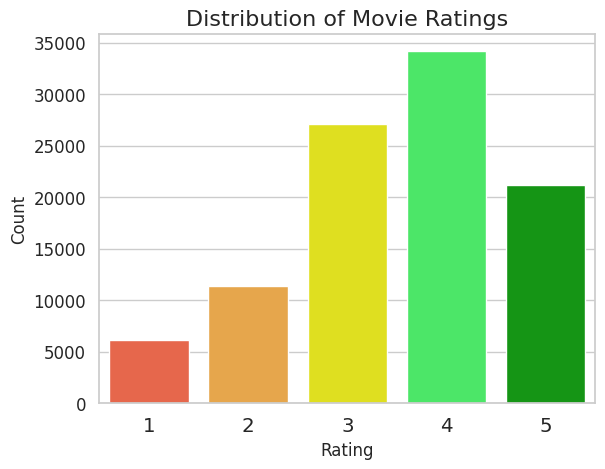

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assign different colors to the ratings
colors = ['#FF5733', '#FFAA33', '#FFFF00', '#33FF57', '#00AA00']

# Count the occurrences of each rating
rating_counts = data['rating'].value_counts().sort_index()

# Create a bar plot using Seaborn with custom colors
g = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors)

# Customize the plot
g.set_title('Distribution of Movie Ratings', fontsize=16)
g.set_xlabel('Rating', fontsize=12)
g.set_ylabel('Count', fontsize=12)

# Show the plot
plt.show()

In [ ]:
print('mean', data['rating'].mean())
print('median', data['rating'].median())

mean 3.52986
median 4.0


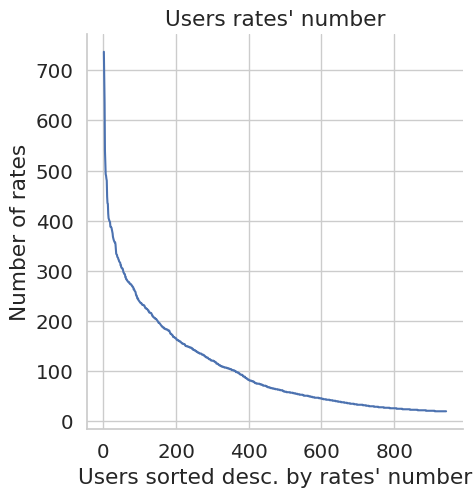

In [ ]:
rating_count_by_user = data.groupby('userId').size().sort_values(ascending=False)
size = rating_count_by_user.size

df = pd.DataFrame(dict(sorted_user_id=range(1,size+1), rating_counts=rating_count_by_user.values))

sns.set(style='whitegrid', font_scale=1.3)
image = sns.relplot(data=df, x="sorted_user_id", y="rating_counts", kind="line")

image.set(xlabel="Users sorted desc. by rates' number",
          ylabel="Number of rates", title="Users rates' number")

### Users analysis

In [ ]:
gender_prop = user.groupby(['gender']).size().reset_index(name='count')
gender_prop['percent'] = gender_prop['count'] / gender_prop['count'].sum()
print(gender_prop)

  gender  count   percent
0      F    273  0.289502
1      M    670  0.710498


Text(0.5, 0, 'Age')

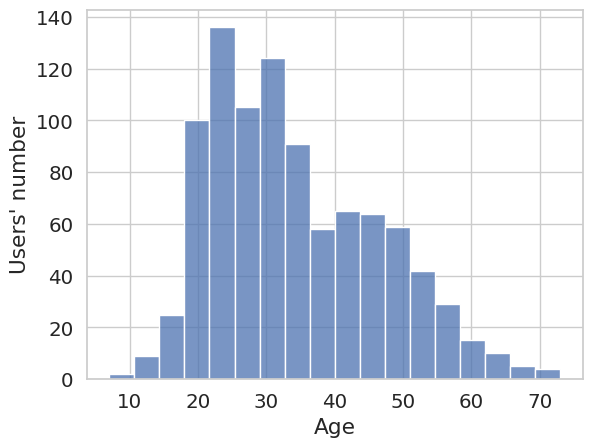

In [ ]:
image = sns.histplot(data=user, x='age')

image.set_ylabel("Users' number")
image.set_xlabel('Age')

Text(0.5, 0, "Users' number")

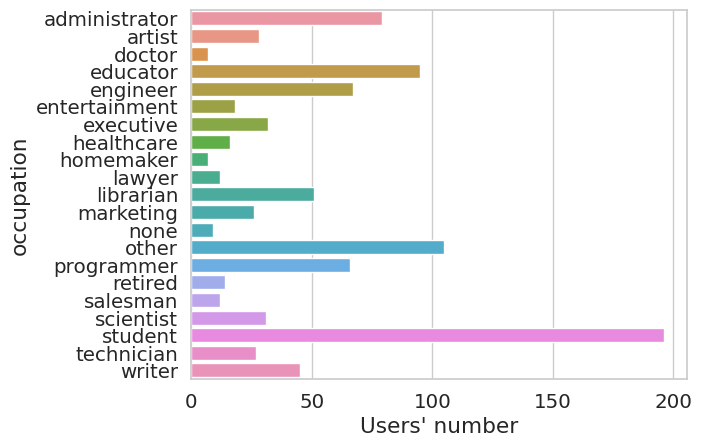

In [ ]:
df = user.groupby(['occupation']).size().reset_index(name='count')

image = sns.barplot(data=df, y='occupation', x='count')
image.set_xlabel("Users' number")

### Movies analysis

In [ ]:
cnt = dict(genre=[], count=[])
for genre in ind2genre:
    count = item[genre].value_counts()[1]
    cnt['genre'].append(genre)
    cnt['count'].append(count)
genre_counts = pd.DataFrame(cnt)

Text(0, 0.5, 'genre')

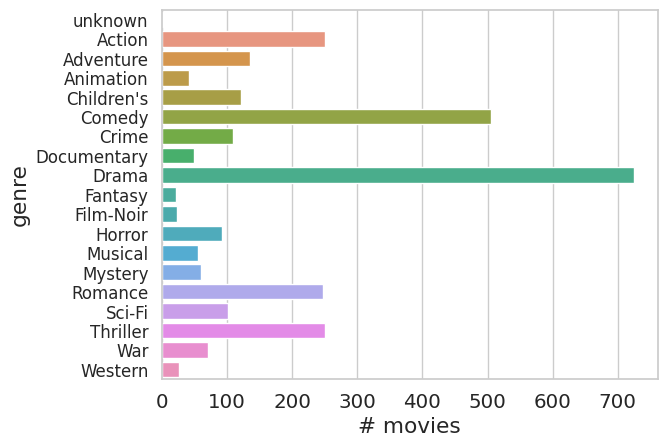

In [ ]:
image = sns.barplot(data=genre_counts, y='genre', x='count')

image.set_xlabel('# movies')
image.set_ylabel('genre')